In [1]:
from PPGprocess import SpikeGenerator
from brian2 import *
from DynapSE import DynapSE
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from ADM_numba import *
from filters import *

import scipy
import sys
from scipy import signal
from scipy import pi
from scipy.io.wavfile import write
from scipy.signal import butter, lfilter, freqz

from equations.dynapse_eq import *
from parameters.dynapse_param import *

# C++ code generation for faster spiking network simulation
set_device('cpp_standalone')
# Ignore Brian2 base warnings
BrianLogger.suppress_name('base')
# The clock of Brian2 simulation for numerically solve ODEs
defaultclock.dt = 20 * us

# Display plots inside Jupyter cell
%matplotlib inline 
# Set the dots-per-inch (resolution) of the images
mpl.rcParams['figure.dpi'] = 90  

In [4]:
"""
from equations.dynapse_eq import *
from parameters.dynapse_param import *

# C++ code generation for faster spiking network simulation
set_device('cpp_standalone')
# Ignore Brian2 base warnings
BrianLogger.suppress_name('base')
# The clock of Brian2 simulation for numerically solve ODEs
defaultclock.dt = 20 * us

"""
signal


<module 'scipy.signal' from '/home/hector/miniconda3/envs/dynapse_sim/lib/python3.8/site-packages/scipy/signal/__init__.py'>

In [5]:
S=1
nt=2
aqtimesquat= 311.5975
aqtimestep= 442.99
aqtimerest=3271.7

file1_1 = scipy.io.loadmat(r"PPG_ACC_dataset/S"+str(S)+"/squat1_acc.mat")
file1_2 = scipy.io.loadmat(r"PPG_ACC_dataset/S"+str(S)+"/squat1_ppg.mat")
t1=(file1_1["ACC"][:,0])*aqtimesquat
x1=file1_1["ACC"][:,1]
y1=file1_1["ACC"][:,2]
z1=file1_1["ACC"][:,3]

ppg=(file1_2["PPG"][:,1])

ppg1_hp=butter_highpass_filter(ppg,3,1000)
ppg1_bp=butter_lowpass_filter(ppg1_hp,10,1000)
length1 =len(ppg1_bp)

file2_1 = scipy.io.loadmat(r"PPG_ACC_dataset/S"+str(S)+"/step1_acc.mat")
file2_2 = scipy.io.loadmat(r"PPG_ACC_dataset/S"+str(S)+"/step1_ppg.mat")
t2=file2_1["ACC"][:,0]*aqtimestep
x2=file2_1["ACC"][:,1]
y2=file2_1["ACC"][:,2]
z2=file2_1["ACC"][:,3]

ppg=(file2_2["PPG"][:,1])


ppg2_hp=butter_highpass_filter(ppg,3,1000)
ppg2_bp=butter_lowpass_filter(ppg2_hp,10,1000)
length2 =len(ppg1_bp)

file3_1 = scipy.io.loadmat(r"PPG_ACC_dataset/S"+str(S)+"/rest1_acc.mat")
file3_2 = scipy.io.loadmat(r"PPG_ACC_dataset/S"+str(S)+"/rest1_ppg.mat")
t3=file3_1["ACC"][:,0]*aqtimerest
x3=file3_1["ACC"][:,1]
y3=file3_1["ACC"][:,2]
z3=file3_1["ACC"][:,3]
ppg=(file3_2["PPG"][:,1])

ppg3_hp=butter_highpass_filter(ppg,3,1000)
ppg3_bp=butter_lowpass_filter(ppg3_hp,10,1000)
length3 =len(ppg1_bp)


"""
subplot(3,1,1)
plt.plot(t,x)
plt.plot(t,y)
plt.plot(t,z)
title('ACC_Squat_1', fontsize=20)
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('amplitude mV', fontsize=16)
plt.grid()

subplot(3,1,2)
plt.plot(t,ppg_filtered2)
plt.grid()
plt.show()
"""

"\nsubplot(3,1,1)\nplt.plot(t,x)\nplt.plot(t,y)\nplt.plot(t,z)\ntitle('ACC_Squat_1', fontsize=20)\nplt.xlabel('time (s)', fontsize=18)\nplt.ylabel('amplitude mV', fontsize=16)\nplt.grid()\n\nsubplot(3,1,2)\nplt.plot(t,ppg_filtered2)\nplt.grid()\nplt.show()\n"

In [6]:

hyst1=np.array([0])
hyst2=np.array([0])
hyst3=np.array([0])

threshold1 =0
threshold2 =-10
for a in ppg1_bp:
    if a> threshold1:
        hyst1 = numpy.append(hyst1, 15)
    elif threshold2<a<threshold1:
        b=len(hyst1)
        hyst1 = numpy.append(hyst1, hyst1[-1])
    elif a < threshold2:
        hyst1 = numpy.append(hyst1,-15)
print(len(hyst1))

for a in ppg2_bp:
    if a> threshold1:
        hyst2 = numpy.append(hyst2, 15)
    elif threshold2<a<threshold1:
        b=len(hyst2)
        hyst2 = numpy.append(hyst2, hyst2[-1])
    elif a < threshold2:
        hyst2 = numpy.append(hyst2,-15)
print(len(hyst1))

for a in ppg3_bp:
    if a> threshold1:
        hyst3= numpy.append(hyst3, 15)
    elif threshold2<a<threshold1:
        b=len(hyst3)
        hyst3 = numpy.append(hyst3, hyst3[-1])
    elif a < threshold2:
        hyst3 = numpy.append(hyst3,-15)
print(len(hyst1))






24848
24848
24848


817.9249999999998


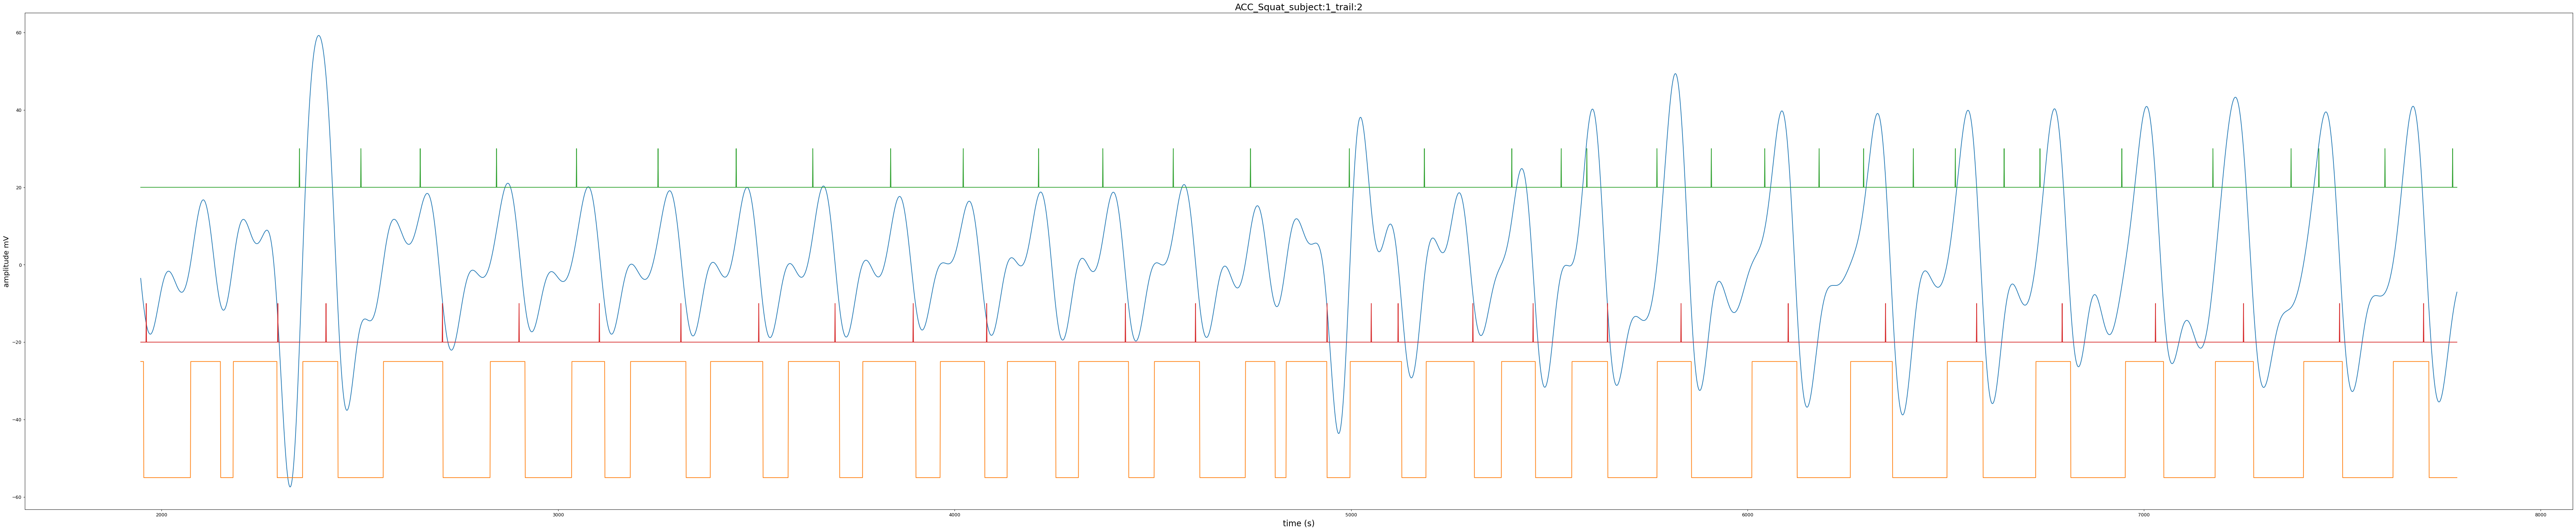

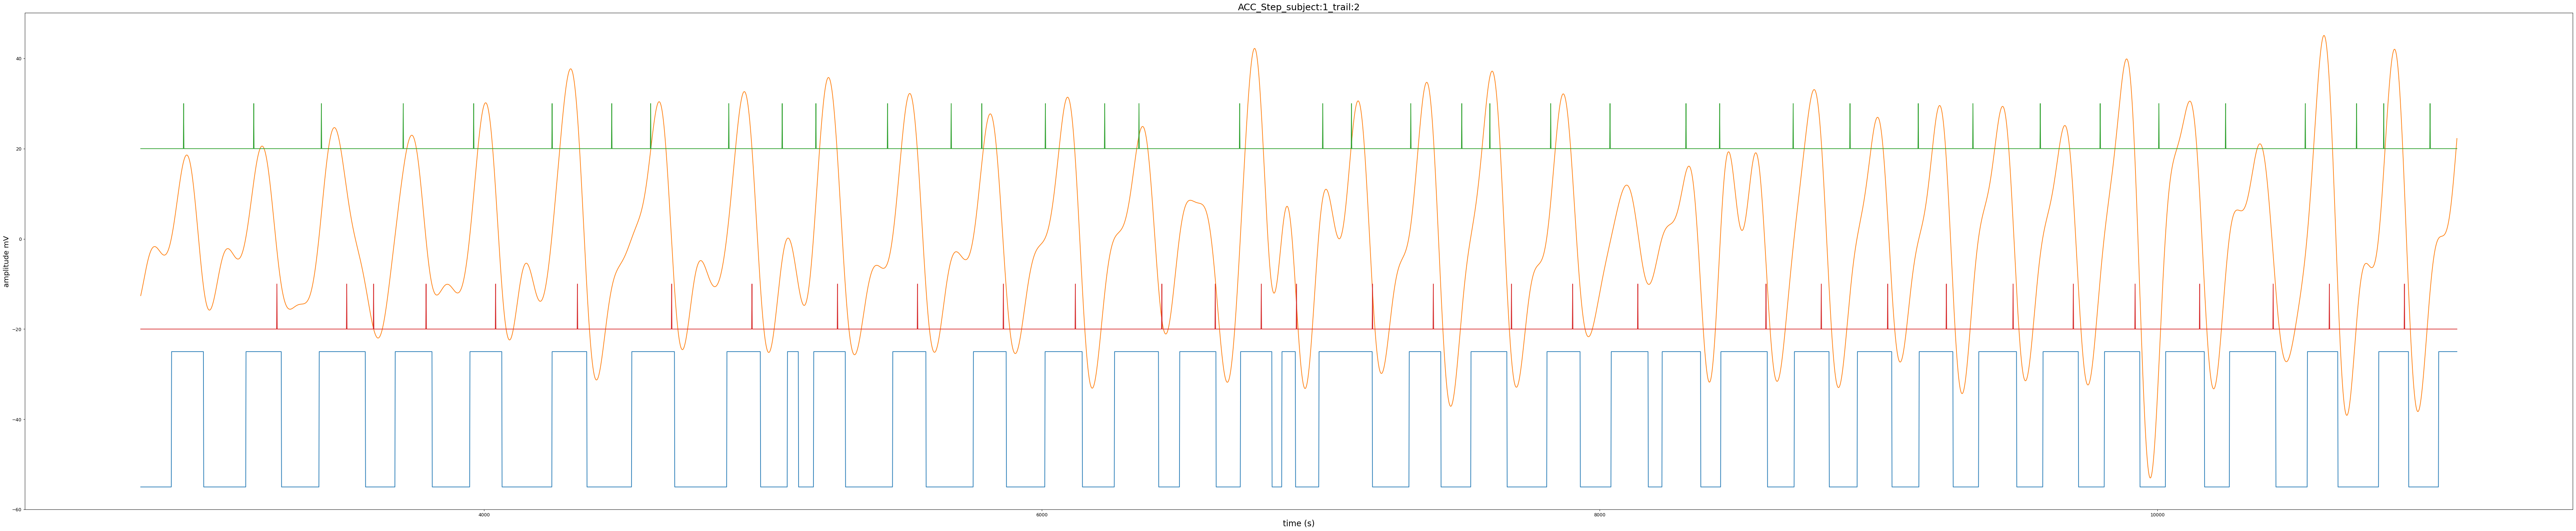

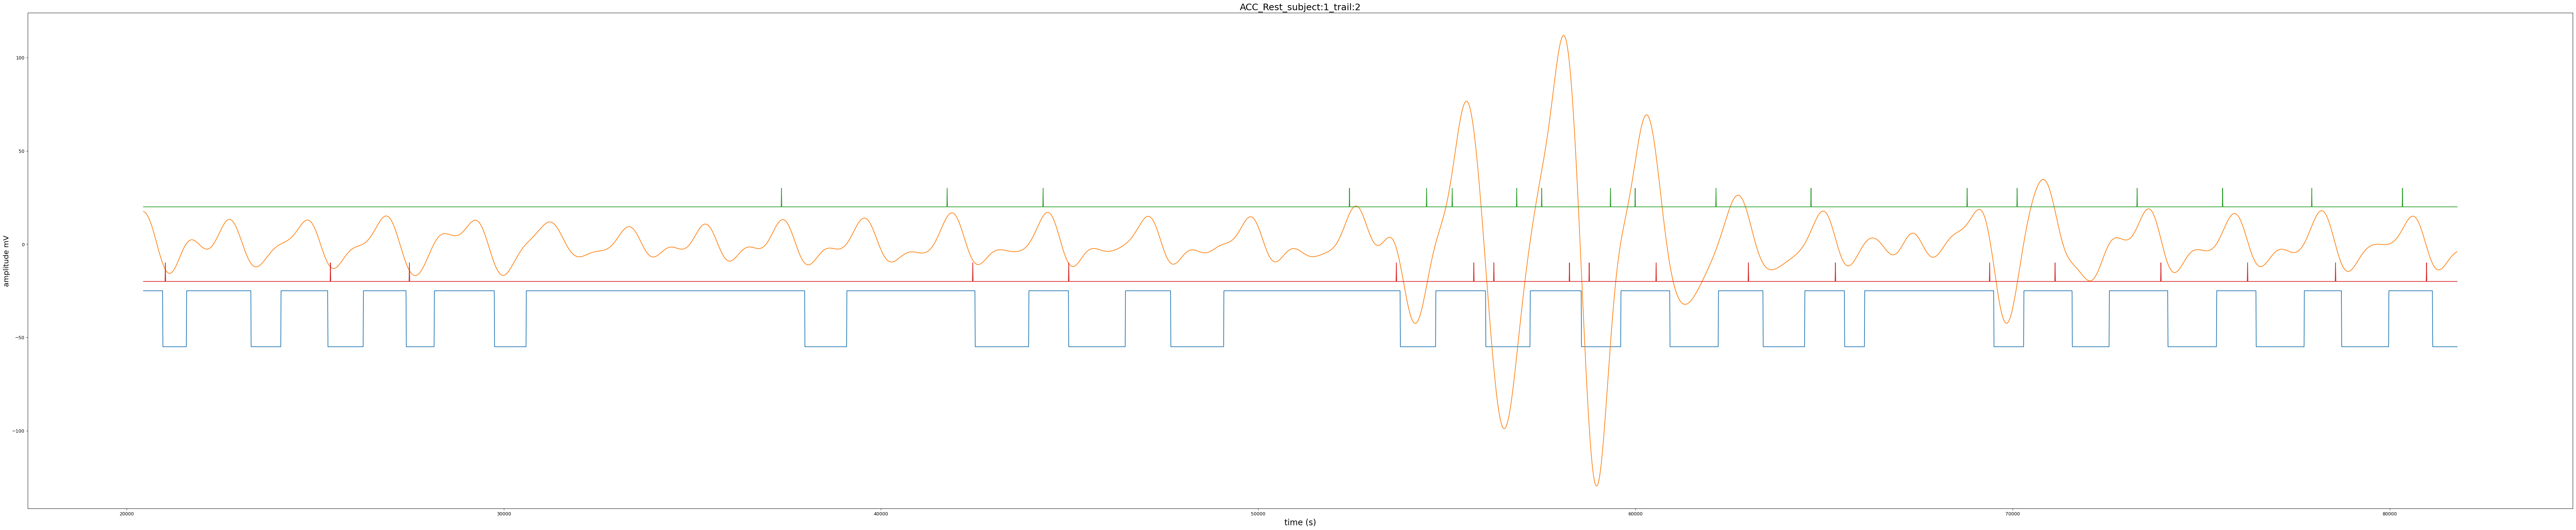

In [7]:
window1=2500
window2=10000
refrtime=.006
lowerthresh=10

spike_t_up,spike_t_dn,times_interpolated,spike_idx_up,spike_idx_dn=ADM(ppg1_bp,20,lowerthresh,10000,refrtime)
ratio = t1[-1]/times_interpolated[-1]#aqtimesquat
plt.figure(figsize=[100,20])
plt.plot(times_interpolated[window1:window2]*ratio,ppg1_bp[window1:window2])
plt.plot(t1[window1:window2],hyst1[window1:window2]-40)
plt.plot(times_interpolated[window1:window2]*ratio,(spike_idx_up[window1:window2])*10+20)
plt.plot(times_interpolated[window1:window2]*ratio,(spike_idx_dn[window1:window2])*10-20)
title('ACC_Squat_subject:'+str(S)+'_trail:'+str(nt), fontsize=20)
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('amplitude mV', fontsize=16)
plt.savefig('testplot1.png')

spike_t_up,spike_t_dn,times_interpolated,spike_idx_up,spike_idx_dn=ADM(ppg2_bp,20,lowerthresh,10000,refrtime)
ratio = t2[-1]/times_interpolated[-1]#aqtimestep
plt.figure(figsize=[100,20])
plt.plot(t2[window1:window2],hyst2[window1:window2]-40)
plt.plot(times_interpolated[window1:window2]*ratio,ppg2_bp[window1:window2])
plt.plot(times_interpolated[window1:window2]*ratio,(spike_idx_up[window1:window2])*10+20)
plt.plot(times_interpolated[window1:window2]*ratio,(spike_idx_dn[window1:window2])*10-20)
title('ACC_Step_subject:'+str(S)+'_trail:'+str(nt), fontsize=20)
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('amplitude mV', fontsize=16)
plt.savefig('testplot2.png')

spike_t_up,spike_t_dn,times_interpolated,spike_idx_up,spike_idx_dn=ADM(ppg3_bp,20,lowerthresh,10000,refrtime)
ratio = t3[-1]/times_interpolated[-1]#aqtimerest
plt.figure(figsize=[100,20])
plt.plot(t3[window1:window2],hyst3[window1:window2]-40)
plt.plot(times_interpolated[window1:window2]*ratio,ppg3_bp[window1:window2])
plt.plot(times_interpolated[window1:window2]*ratio,(spike_idx_up[window1:window2])*10+20)
plt.plot(times_interpolated[window1:window2]*ratio,(spike_idx_dn[window1:window2])*10-20)
title('ACC_Rest_subject:'+str(S)+'_trail:'+str(nt), fontsize=20)
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('amplitude mV', fontsize=16)
plt.savefig('testplot3.png')


print(.01*ratio)

In [8]:

#plt.plot(t[0:window],x[0:window])

#plt.plot(t[window1:window2],np.full((window2-window1),threshold1))
#plt.plot(t[window1:window2],np.full(((window2-window1),threshold2))

#print(len(ppg1_bp))
#print(len(times_interpolated))
#print(t[-1])
#print(times_interpolated[-1])
#print(len(spike_idx_up))
#ratio = t[-1]/times_interpolated[-1]
#reftime=ratio*.0025
#print("real refractory time:"+str(reftime))
#print(len(t))
#
#print(times_interpolated[0:window2])
#print(spike_t_up)
#print(t[0:window2])
#print(ppg1_bp[0:window2])

In [9]:
network = Network() # Instantiate a Brian2 Network
chip = DynapSE(network) # Instantiate a Dynap-SE1 chip implementing neural and synaptic silicon dynamics

k=0
f=0

if k==0:
    spikes=SpikeGenerator()
elif k==1:
    spikes=ppg1_bp
    

In [10]:
# Reinitialize the device
device.reinit()
device.activate()
defaultclock.dt = 20 * us

spike_timing = np.where(spikes==1)[0] * ms # Timing of spikes
neuron_indices = np.zeros(len(spike_timing)) # ID of spike sources
input_spike_generator = SpikeGeneratorGroup(1, indices=neuron_indices, times=spike_timing, name='InpSpikeGenerator')

network = Network() # Instantiate a Brian2 Network
chip = DynapSE(network) # Instantiate a Dynap-SE1 chip implementing neural and synaptic silicon dynamics


In [3]:
DPI_neuron1 = chip.get_neurons(2, 'Core_1') # Allocate single DPI neuron from Core 1

DPI_neuron2 = chip.get_neurons(2, 'Core_1') # Allocate single DPI neuron from Core 1

DPI_neuron3 = chip.get_neurons(2, 'Core_1') # Allocate single DPI neuron from Core 1

DPI_neuron4 = chip.get_neurons(2, 'Core_1') # Allocate single DPI neuron from Core 1

DPI_neuron5 = chip.get_neurons(2, 'Core_1') # Allocate single DPI neuron from Core 1

DPI_neuron6 = chip.get_neurons(2, 'Core_1') # Allocate single DPI neuron from Core 1

DPI_neuron7 = chip.get_neurons(2, 'Core_1') # Allocate single DPI neuron from Core 1

DPI_neuron8 = chip.get_neurons(2, 'Core_1') # Allocate single DPI neuron from Core 1

#neuron 1 is the reciever neuron, while 

DPI_NMDA_synapse = chip.add_connection(input_spike_generator, DPI_neuron1, synapse_type='NMDA') # Define a slow excitatory synapse
DPI_AMPA_synapse = chip.add_connection(input_spike_generator, DPI_neuron1, synapse_type='AMPA') # Define a fast excitatory synapse
DPI_GABA_B_synapse = chip.add_connection(input_spike_generator, DPI_neuron1, synapse_type='GABA_B') # Define a substracting synapse

DPI_NMDA_synapse = chip.add_connection(input_spike_generator, DPI_neuron2, synapse_type='NMDA') # Define a slow excitatory synapse
DPI_AMPA_synapse = chip.add_connection(input_spike_generator, DPI_neuron2, synapse_type='AMPA') # Define a fast excitatory synapse
DPI_GABA_B_synapse = chip.add_connection(input_spike_generator, DPI_neuron2, synapse_type='GABA_B') # Define a substracting synapse


DPI_NMDA_synapse = chip.add_connection(input_spike_generator, DPI_neuron3, synapse_type='NMDA') # Define a slow excitatory synapse
DPI_AMPA_synapse = chip.add_connection(input_spike_generator, DPI_neuron3, synapse_type='AMPA') # Define a fast excitatory synapse
DPI_GABA_B_synapse = chip.add_connection(input_spike_generator, DPI_neuron3, synapse_type='GABA_B') # Define a substracting synapse


DPI_NMDA_synapse = chip.add_connection(input_spike_generator, DPI_neuron4, synapse_type='NMDA') # Define a slow excitatory synapse
DPI_AMPA_synapse = chip.add_connection(input_spike_generator, DPI_neuron4, synapse_type='AMPA') # Define a fast excitatory synapse
DPI_GABA_B_synapse = chip.add_connection(input_spike_generator, DPI_neuron4, synapse_type='GABA_B') # Define a substracting synapse


# In Brian2 creating Synapses instance does not connect two endpoints, it only specifies synaptic dynamics 
# Let's connect two endpoints and set an initial weight of 300.

if select == 1:
    chip.connect(DPI_NMDA_synapse, True)
    DPI_NMDA_synapse.weight = 300

else:
    
    chip.connect(DPI_AMPA_synapse, True)
    DPI_AMPA_synapse.weight = 300


chip.connect(DPI_GABA_B_synapse, True)
DPI_AMPA_synapse.weight = 300



NameError: name 'chip' is not defined